# QUESTION 1

Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
salary and experience with exerience in x-axis and salary in y axis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path="/home/AIML_Student/Desktop/2030B/week6/data.csv"
data=pd.read_csv(path)
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


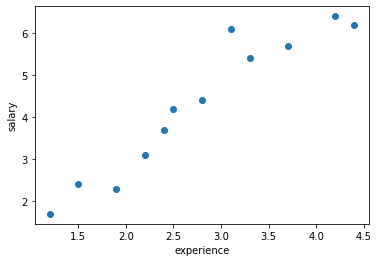

In [3]:
plt.scatter(data['experience'],data['salary'])
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

In [4]:
def simpleLinearRegression(x,y):
    xy=x*y
    x2=pow(x,2)
    sumx=x.sum()
    sumy=y.sum()
    sumxy=xy.sum()
    sumx2=x2.sum()
    n=data.shape[0]
    slope=((n*sumxy)-(sumx*sumy))/((n*sumx2)-pow(sumx,2))
    intercept=(sumy-(slope*sumx))/n
    return(intercept,slope)

In [5]:
def results(slope,intercept):
    x=np.array(data['experience'])
    y=np.array(data['salary'])
    y_new=(slope*x)+intercept
    err=y-y_new
    mse=((pow(err,2)).sum())/data.shape[0]
    return(y_new,mse)

In [6]:
manualInter,manualSlop=simpleLinearRegression(data['experience'],data['salary'])
y_new,manualMSE=results(manualSlop,manualInter)
manualMSE

0.2336671081028057

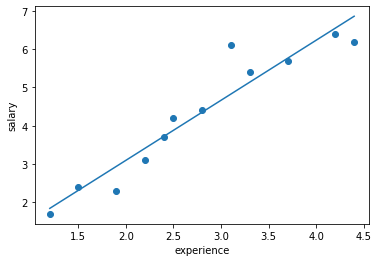

In [7]:
plt.plot(data['experience'],y_new)
plt.scatter(data['experience'],data['salary'])
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph
between beta and mean squared error(MSE) for each case.

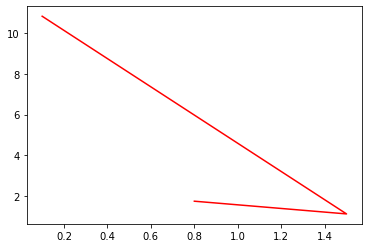

In [8]:
slopes=[0.1,1.5,0.8]
b=1.1
mse=[]
for i in range(3):
    _,m=results(slopes[i],b)
    mse.append(m)
plt.plot(slopes,mse,color='r')
plt.show()

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between
beta and mean squared error(MSE).

In [9]:
def generateNumbers(start,end,increment):
    numList = []
    current = start
    while current <= end:
        numList.append(current)
        current += increment
    return numList

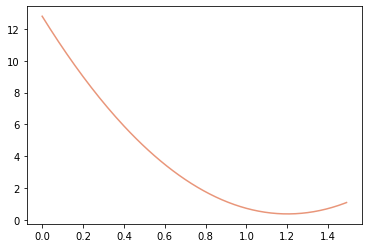

In [10]:
intercept=1.1
mse=[]
slopeList=generateNumbers(0,1.5,0.01)
for i in range(len(slopeList)):
    _,m=results(slopeList[i],intercept)
    mse.append(m)
plt.plot(slopeList,mse,color='darksalmon')
plt.show()

c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between
intercept and mean squared error(MSE).

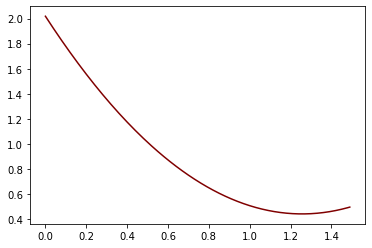

In [11]:
slope=1.1
mse=[]
interList=generateNumbers(0,1.5,0.01)
for i in range (len(interList)):
    _,m=results(slope,interList[i])
    mse.append(m)
plt.plot(interList,mse,color='maroon')
plt.show()

d. Use the scikit learn and compare the results of MSE.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
model=LinearRegression()
X=np.array(data['experience']).reshape(-1,1)
y=np.array(data['salary']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
modelInter=model.intercept_
modelSlope=model.coef_
modelMSE=mean_squared_error(y_test, y_pred)
print(modelInter,modelSlope)
modelMSE

[0.01617647] [[1.55147059]]


0.03051659818339102

In [17]:
print(f'absolute difference between MSEs:{manualMSE}-{modelMSE}={abs(manualMSE-modelMSE)}')

absolute difference between MSEs:0.2336671081028057-0.03051659818339102=0.20315050991941466


# QUESTION 2

For learning rate = 0.05
Cost is : 10.520833333333332
Cost is : 2.994560668054107
Cost is : 0.919628341197938
Cost is : 0.34751863486609713
Cost is : 0.18970694450748363
Cost is : 0.14610956134106295
Cost is : 0.1339996098627917
Cost is : 0.13057099401718908
Cost is : 0.12953653629224704
Cost is : 0.12916298314342117
Cost is : 0.1289725036794911
Cost is : 0.1288333611327607
For learning rate = 0.01
Cost is : 10.520833333333332
Cost is : 8.640559087833275
Cost is : 7.100527519440785
Cost is : 5.839169588219182
Cost is : 4.806057558686426
Cost is : 3.959888910798872
Cost is : 3.266835074904952
Cost is : 2.699188973480103
Cost is : 2.234257298679142
Cost is : 1.8534532392228265
Cost is : 1.5415533840525892
Cost is : 1.2860890939361327
For learning rate = 0.02
Cost is : 10.520833333333332
Cost is : 6.947794698555324
Cost is : 4.603386261971384
Cost is : 3.065123340072303
Cost is : 2.0557995747632747
Cost is : 1.3935305853590494
Cost is : 0.9589759346800957
Cost is : 0.6738323626553268
Cost

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


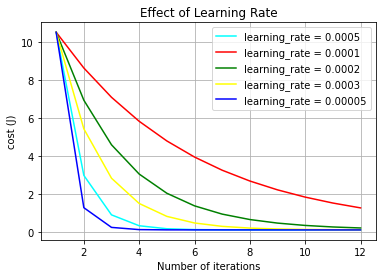

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

se=pd.read_csv(path)

dt = se.values

y = dt[:,:-1]
x = dt[:,-1].reshape(dt.shape[0],1)
a=x.shape[0]
ones=np.ones((a,1))
x= np.concatenate((ones,x),axis=1)

def model(x, y, learning_rate, iteration):
    m = y.size
    theta = np.zeros((x.shape[1], 1))
    cost_list = []
    print("For learning rate =",learning_rate)
    for i in range(iteration):
        y_pred = np.dot(x, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - y))
        d_theta = (1/m)*np.dot(x.T, y_pred - y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        print("Cost is :", cost)
    return theta, cost_list    

iteration = 60//5;
learning_rate = 0.05;
theta_1, cost_history_1 = model(x, y, learning_rate, iteration)

learning_rate = 0.01;
theta_2, cost_history_2 = model(x, y, learning_rate, iteration)

learning_rate = 0.02;
theta_3, cost_history_3 = model(x, y, learning_rate, iteration)

learning_rate = 0.03;
theta_4, cost_history_4 = model(x, y, learning_rate, iteration)

learning_rate = 0.07;
theta_5, cost_history_5 = model(x, y, learning_rate, iteration)

plt.plot(range(1, iteration +1), cost_history_1, color ='cyan', label = 'learning_rate = 0.0005')
plt.plot(range(1, iteration +1), cost_history_2, color ='red', label = 'learning_rate = 0.0001')
plt.plot(range(1, iteration +1), cost_history_3, color ='green', label = 'learning_rate = 0.0002')
plt.plot(range(1, iteration +1), cost_history_4, color ='yellow', label = 'learning_rate = 0.0003')
plt.plot(range(1, iteration +1), cost_history_5, color ='blue', label = 'learning_rate = 0.00005')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate")
plt.legend()

sgd = SGDRegressor(penalty = "l2",learning_rate = "invscaling")
sgd.fit(x, y)
y_pred = sgd.predict(x)

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")